# **Lung cancer risk prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

In [2]:
# Load dataset
data = pd.read_csv("../input/lung-cancer/survey lung cancer.csv")

In [3]:
# First look at dataset
print(f"Dataframe (rows, columns) : {data.shape}")
print(f"\n\n Check first few lines :\n")
data.head()

Dataframe (rows, columns) : (309, 16)


 Check first few lines :



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Dataframe column info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Encode object variables to numeric
LabelEncoder = LabelEncoder() 
# Lung cancer positive = 1, Male = 1
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])
data["GENDER"] = LabelEncoder.fit_transform(data["GENDER"])

In [6]:
# Dataframe summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


<AxesSubplot:>

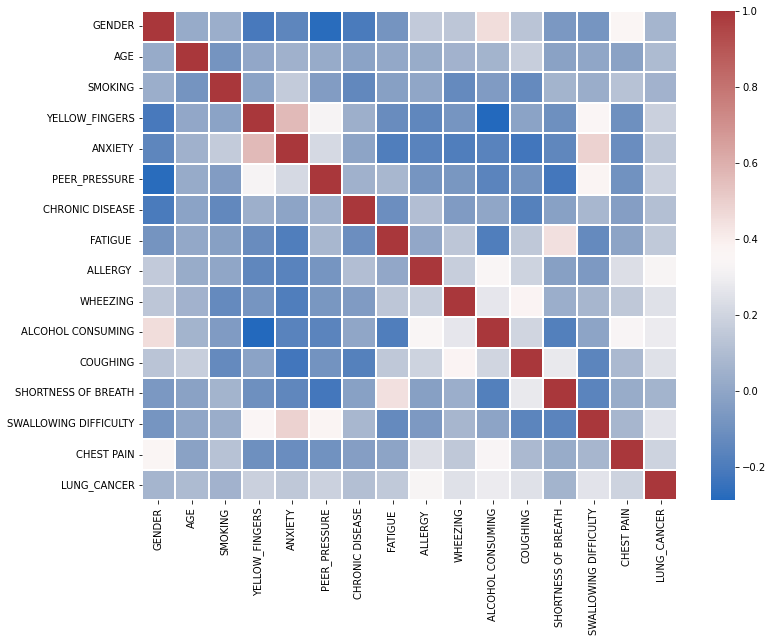

In [7]:
# Visualize correlation among variables
palette = sns.color_palette("vlag", as_cmap=True)
plt.subplots(figsize =(12, 9))
sns.heatmap(data.corr(), cmap = palette, linewidths=0.1, linecolor='white')

In [8]:
# Remove outcome column and add to y variable
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]
print(x.head())
print(y.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    2                      2     

In [9]:
# Split train and test sets; using 60% for training
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.6, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (123, 15), (123,)
Shape of testing data : (186, 15), (186,)


In [10]:
# Test different kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
  print("Kernel:"+str(kernel))
  svm = SVC(kernel=kernel).fit(x, y)
  svm_pred = svm.predict(x_test)
  svm_conf = confusion_matrix(y_test, svm_pred)
  svm_report = classification_report(y_test, svm_pred)
  print(f"Confusion Matrix : \n\n{svm_conf}")
  print(f"\nClassification Report : \n\n{svm_report}")

Kernel:linear
Confusion Matrix : 

[[ 11   7]
 [  4 164]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.96      0.98      0.97       168

    accuracy                           0.94       186
   macro avg       0.85      0.79      0.82       186
weighted avg       0.94      0.94      0.94       186

Kernel:rbf
Confusion Matrix : 

[[  0  18]
 [  0 168]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.90      1.00      0.95       168

    accuracy                           0.90       186
   macro avg       0.45      0.50      0.47       186
weighted avg       0.82      0.90      0.86       186

Kernel:poly
Confusion Matrix : 

[[  0  18]
 [  0 168]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [11]:
# Test different gamma values
gammas = [0.001, 0.1, 1, 10, 100]
for gamma in gammas:
  print("Gamma:"+str(gamma))
  svm = SVC(kernel = "linear",gamma = gamma).fit(x, y)
  svm_pred = svm.predict(x_test)
  svm_conf = confusion_matrix(y_test, svm_pred)
  svm_report = classification_report(y_test, svm_pred)
  print(f"Confusion Matrix : \n\n{svm_conf}")
  print(f"\nClassification Report : \n\n{svm_report}")

Gamma:0.001
Confusion Matrix : 

[[ 11   7]
 [  4 164]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.96      0.98      0.97       168

    accuracy                           0.94       186
   macro avg       0.85      0.79      0.82       186
weighted avg       0.94      0.94      0.94       186

Gamma:0.1
Confusion Matrix : 

[[ 11   7]
 [  4 164]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.96      0.98      0.97       168

    accuracy                           0.94       186
   macro avg       0.85      0.79      0.82       186
weighted avg       0.94      0.94      0.94       186

Gamma:1
Confusion Matrix : 

[[ 11   7]
 [  4 164]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     

In [12]:
# Test different C values
Cs = [0.1, 1, 10, 100, 1000]
for C in Cs:
  print("C:"+str(C))
  svm = SVC(kernel = "linear",gamma = 1, C = C).fit(x, y)
  svm_pred = svm.predict(x_test)
  svm_conf = confusion_matrix(y_test, svm_pred)
  svm_report = classification_report(y_test, svm_pred)
  print(f"Confusion Matrix : \n\n{svm_conf}")
  print(f"\nClassification Report : \n\n{svm_report}")

C:0.1
Confusion Matrix : 

[[  6  12]
 [  2 166]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.33      0.46        18
           1       0.93      0.99      0.96       168

    accuracy                           0.92       186
   macro avg       0.84      0.66      0.71       186
weighted avg       0.91      0.92      0.91       186

C:1
Confusion Matrix : 

[[ 11   7]
 [  4 164]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.96      0.98      0.97       168

    accuracy                           0.94       186
   macro avg       0.85      0.79      0.82       186
weighted avg       0.94      0.94      0.94       186

C:10
Confusion Matrix : 

[[ 12   6]
 [  4 164]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
         

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


<AxesSubplot:>

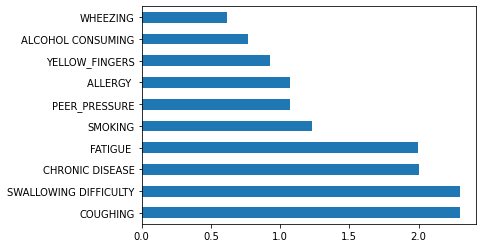

In [13]:
# Discover important features
feature_names = list(x.columns)
print(feature_names)
features = np.array(feature_names)
pd.Series(abs(svm.coef_[0]), index=features).nlargest(10).plot(kind='barh')

In [14]:
# Support Vector Machine final model
svm = SVC(C = 10, gamma = 0.01, kernel = "linear")
# Fit model
svm.fit(x_train, y_train)
# Make predictions
svm_pred = svm.predict(x_test)
# Show confusion matrix and classification accuracy
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 13   5]
 [ 12 156]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.52      0.72      0.60        18
           1       0.97      0.93      0.95       168

    accuracy                           0.91       186
   macro avg       0.74      0.83      0.78       186
weighted avg       0.93      0.91      0.92       186


The Accuracy of Support Vector Machine is 90.86 %
